Multi-polynomial Regression with Descision Boundary

In [6]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [9]:
#Load the file land_type.csv and take a quick look at it
df = pd.read_csv("/Users/karnikabhardwaj/Downloads/land_type.csv")
df.head()

,latitude,longitude,land_type
0,-3.226989,-0.356542,0.0
1,-1.496209,0.416730,1.0
2,0.995726,-0.887490,1.0
3,0.633447,-1.898605,1.0
4,-0.076218,-0.794730,1.0


In [10]:
#Assign the variable x and y as the predictor and response
x = df.drop(['land_type'], axis = 1)
y = df['land_type']


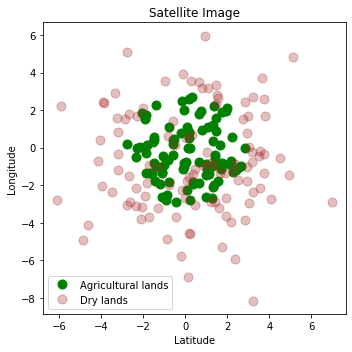

In [13]:
#Plotting the data

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot the latitude vs longitude values  for y==1
# NOTE: use df[colname][y==1] to get values for 'latitude' & 'longtitude'
   
ax.plot(x['latitude'][y==1], x['longitude'][y==1], 'o',c='green', markersize=9,label='Agricultural lands')

# Repeat the same, but for y==0

ax.plot(x['latitude'][y==0], x['longitude'][y==0], 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

# Add labels

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [14]:
#Split the dataset with random state = 32
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state=32)

In [15]:
#Make a logistic regression model with givel C value

cval = 1e15

lr = LogisticRegression(C=cval, max_iter = 16000)

#Use polynomial features to make a response variable of degree 10

degree = 10
x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
x_poly_val = PolynomialFeatures(degree=degree).fit_transform(x_val)



In [18]:
# Fit the model with training data 

lr.fit(x_poly_train, y_train)

# Make predictions on the validation data

y_val_pred = lr.predict(x_poly_val)

validation_accuracy = accuracy_score(y_val_pred, y_val)

print("Accuracy=",validation_accuracy)

Accuracy= 0.825


/Users/karnikabhardwaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


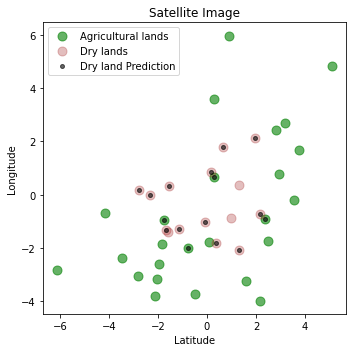

In [20]:
#plotting 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

xlat_0 = x_val.values[y_val==0,0]
xlong_0 = x_val.values[y_val==0,1]

ax.plot(xlat_0, xlong_0, 'o',c='green',alpha = 0.6, markersize=9,label='Agricultural lands')

xlat_1 = x_val.values[y_val==1,0]
xlong_1 = x_val.values[y_val==1,1]

ax.plot(xlat_1, xlong_1, 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

xlat_pred_1 = x_val.values[y_val_pred==1,0]
xlong_pred_1 = x_val.values[y_val_pred==1,1]
ax.plot(xlat_pred_1, xlong_pred_1, 'o',c='black', alpha = 0.6, markersize=4,label='Dry land Prediction')


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

Visualising the data

In [21]:
new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 3, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

x = new_data[:, :-1]
y = new_data[:, -1]


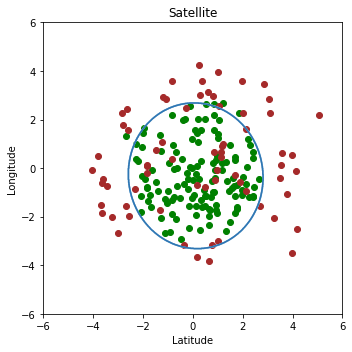

In [25]:

def plot_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens',degree=0):
    
    
    if plot_data:
        # PLOT DATA
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='brown')
    
    # CREATE MESH
    interval = numpy.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.01)
    n = numpy.size(interval)
    x1, x2 = numpy.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = numpy.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    xxpoly = PolynomialFeatures(degree).fit_transform(xx)
    yy = model.predict(xxpoly)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.5, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.5, cmap=color)
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    
    return ax


# The helper function below, fits a Logistic Regression model, and plots the boundary around it using the function above

def fit_and_plot_dt(x, y, c, title, ax, plot_data=True, fill=True, color='Blues',degree=0):

    lreg = LogisticRegression(C=c, max_iter=6000)

    x1 = PolynomialFeatures(degree).fit_transform(x)
    lreg.fit(x1, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_boundary(x, y, lreg, title, ax, plot_data, fill, color,degree=degree)
    
    return ax



fig, ax = plt.subplots(figsize=(5, 5))

# Choose the C_value and the degree of the polynomial for the polynomial logistic regression

C_value = 1e15

degree = 2

# The helper function below

ax = fit_and_plot_dt(x, y, C_value, 'Satellite',ax, plot_data=True, fill=False,degree=degree) 

# Setting the limits to better visualsize the plot

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.tight_layout()
plt.show() 